<a href="https://colab.research.google.com/github/pratikgujral/Machine-Learning-Scientist-With-Python/blob/master/Cluster_Analysis_In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content
- Part-0: Introduction
- Part 1: Introduction to Clustering
- Part 2: Hierarchical CLustering
- Part 3: K-Means Clustering
- Part 4: Clustering in Real World

# Part-0: Introduction
You have probably come across Google News, which automatically groups similar news articles under a topic. Have you ever wondered what process runs in the background to arrive at these groups? In this tutorial, we will look at unsupervised learning through clustering using the SciPy library in Python. This tutorial covers pre-processing of data and application of hierarchical and k-means clustering. Through the tutorial, we will explore player statistics from a popular football video game, FIFA 18.

In [1]:
# To display IFrame videos
from IPython.display import IFrame

# Part-1: Introduction to Clustering
[SLIDES](https://projector-video-pdf-converter.datacamp.com/14739/chapter1.pdf)

In [2]:
IFrame('https://projector.datacamp.com/?auto_play=play&amp;projector_key=course_14739_2f928768c0006f538ec5eaa9188fa981', width=800, height=400)

## Clustering
- The process of grouping items with similar characteristics 
- Grouping is done in such a way that items in one group are close to one another on some characteristic(s), as compared to any item in another group.
- Unsupervised learning


## Pokémon sightings
There have been reports of sightings of rare, legendary Pokémon. We have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively

In [3]:
# Given data
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

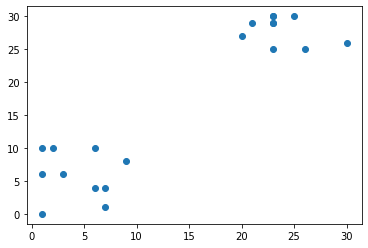

In [4]:
from matplotlib import pyplot as plt
plt.scatter(x,y)
plt.show()

Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!

## Basics of clsuter analysis

In [5]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_c77f9ecb23a73deb1c441f99c40bed48', width=800, height=400)

### Clustering algorithms
There are many clustering algorithms available
- Hierarchical clustering
- K Means clustering
- DBSCAN
- Gaussian methods etc.

### Way of clustering
- Initially every individual poitn is considered as a cluster
- **Cluster center** is the mean of attributes of all data points in a given cluster
- Then, distance between all pairs of cluster centers are computed, and the two cluster centers that are closest to one another are combined together to form a larger cluster. This is repeated until we are left with desired no. of clusters.

### Hierarchical Clustering with Scipy
- We use **`linkage`**, **`fcluster`** methods from **`scipy.cluster.hierarchy`**
- **`linkage()`** computes distances between intermediate clusters
- **`fcluster()`** generates clusters and assignes associate cluster labels to a new column in the DataFrame

## K Means clustering
- First it generates cluster centers at random locations. Number of cluster center points to be generated are provided by the user
- Distance to these cluster centers is computer for each point, and the point is assigned to its closest cluster.
- The cluster centers are recomputed.
- This process is repeated a pre-defined number of times.

### K Means Clustering with Scipy
- We use **`kmeans`** and **`vq`** from **`scipy.kmeans.vq`**.
- **`kmeans()`:** Used to compute centroids of the cluster
- **`vq`**: USed to assign a point to a cluster

## Pokémon sightings: hierarchical clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, we identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, we will form two clusters of the sightings using hierarchical clustering.
'x' and 'y' are columns of X and Y coordinates of the locations of sightings.

In [6]:
# Given information
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


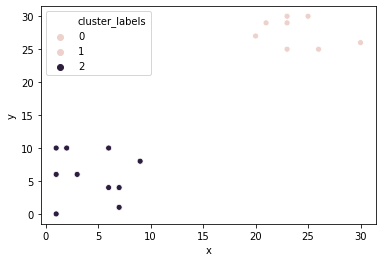

In [7]:
# Creating a Pandas Dataframe with x and y as two columns
import pandas as pd
df = pd.DataFrame(data=zip(x,y), columns=['x','y'])

# Importing libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage, fcluster

# Using the linkage() function to compute distance
Z = linkage(df, method='ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, t=2, criterion='maxclust')
# t=3 denotes we need max of 2 clusters only.

# Plotting the coordinates colored by their cluster labels
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='x', y='y', data=df, hue='cluster_labels')
plt.show()

Notice that the cluster labels are plotted with different colors. The resulting plot has an extra cluster labelled 0 in the legend. This will be explained later.

## Pokémon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

In [8]:
# Given information
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

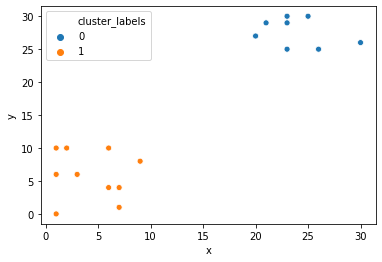

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import vq, kmeans

df = pd.DataFrame(zip(x,y), columns=['x', 'y'], dtype=float)

# Computing cluster centers
centroids, _ = kmeans(df, 2)

# Assigning cluster labels to all data points
df['cluster_labels'], _ = vq(df, centroids)

# Plotting the data points colored by cluster labels
sns.scatterplot(x='x', y='y', data=df, hue='cluster_labels')
plt.show()

Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different results later in the course.

---

## Data Preparation for Cluster Analysis
### Why do we need to prepare data for cluster analysis
- We may have variables that have incomparable units (Eg. Product dimensions in cm, price in $)
- Variables with same units, but have vastly different scales and/or variances (Eg. expenditure on cereals and expenditure on travel)
- Data in raw form may lead to introduction of bias in clustering, with heavy dependence on one variable.
- **SOLUTION:** Normalize the individual variables

## Normalization of data
- Rescale data to standard deviation of 1
> **`x_new = x/std_ev(x)`**


In [10]:
IFrame("https://projector.datacamp.com/?auto_play=play&amp;projector_key=course_14739_2e0dd1f4c55f2da39c4276b1b0395184", width=800, height=400)

## Normalize basic list data
Now that you are aware of normalization, let us try to normalize some data. `goals_for` is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the **`whiten()`** function from **`scipy.cluster.vq`**.

In [11]:
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Using whiten() function to normalize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


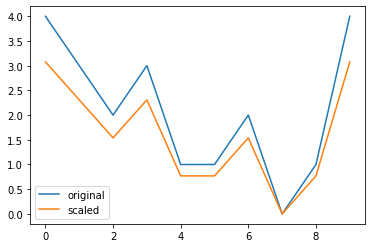

In [12]:
import matplotlib.pyplot as plt

# Plotting original data (list)
plt.plot(goals_for, label='original')

# Plotting normalized data
plt.plot(scaled_data, label='scaled')

# Putting the legend
plt.legend()

plt.show()

Notice the scaled values have lower variations in them.

## Normalization of small numbers
In earlier examples, we have normalization of whole numbers. Next we will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. 

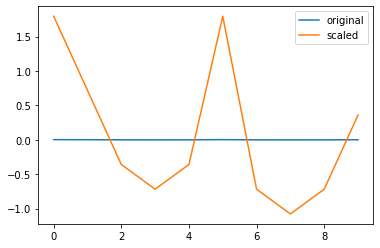

In [13]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

Notice how the changes in the original data are negligible as compared to the scaled data

## FIFA 18: Normalize data
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that we are about to work on contains data on the 1000 top individual players in the game. We will explore various features of the data as we move ahead in the course. In this exercise, we will work with two columns, `eur_wage`, the wage of a player in Euros and `eur_value`, their current transfer market value.

In [14]:
fifa = pd.read_csv('https://assets.datacamp.com/production/repositories/3842/datasets/10b1fd2d470d12f2486be7ffb05ab96a1b745631/fifa_18_sample_data.csv')

print(fifa.shape)
fifa.head()

(1000, 185)


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,...,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,...,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,High,Medium,Right,75,89,62,81,83,96,81,...,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,...,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,Medium,Medium,Right,15,13,25,55,11,30,14,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


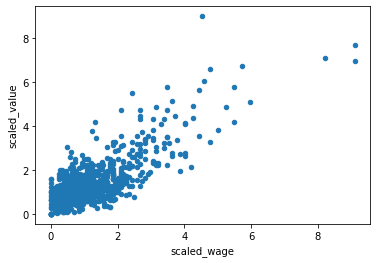

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [15]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

As we can see the scaled values have a standard deviation of 1.

---
---

# Part-2: Hierarchical Clustering
[SLIDES](https://projector-video-pdf-converter.datacamp.com/14739/chapter2.pdf)

## Creating a distance matrix using linkage
- Achieved through linkage method available in Scipy
> **`scipy.cluster.hierarchy.linkage(observations, method='single', metric='euclidean', optimal_ordering=False)`**
- This computes distance between clusters as we go from n clusters to 1 cluster, where n is the number of points.
  - **`method`:** How to calculate the proximity between two clusters
  - **`metric`:** Distance metric
  - **`optimal ordering`:** (Optional argument) Changes the order of linkage matrix

### Which method should I use?
- **`single`:** Based on two closest objects
- **`complete`:** Based on two farthest objects
- **`average`:** Based on arithmetic mean of all objects
- **`centroid`:** Based on geometric mean of all objects
- **`median`:** Based on median of all objects
- **`ward`:** Computes cluster proximity using the difference between the (sum of squares of the joint clusters) and (individual sum of squares)

## Creating cluster labels using `fcluster`
> **`scipy.cluster.hierarchy.fcluster(distance_matrix, num_clusters, criterion`**
- **`distance_matrix`:** Output of `linkage()` method
- **`num_clusters`:** Number of clusters
- **`criterion:`** How to decide thresholds to form clusters

In [16]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_62fa3fc76a4bf3249454fe05fa169373', width=800, height=400)

## Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. We have the data of last year's footfall, the number of people at the convention ground at a given time. We would like to decide the location of our stall to maximize sales. Using the `ward` method, apply hierarchical clustering to find the two points of attraction in the area.

In [17]:
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87,
       83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27,
       17, 17]

y_coordinate = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 
                97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]

In [18]:
from scipy.cluster.vq import whiten

x_scaled = whiten(x_coordinate)
y_scaled = whiten(y_coordinate)

comic_con = pd.DataFrame(zip(x_coordinate, y_coordinate, x_scaled, y_scaled),
                         columns=['x_coordinate', 'y_coordinate', 'x_scaled', 
                                  'y_scaled'])
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


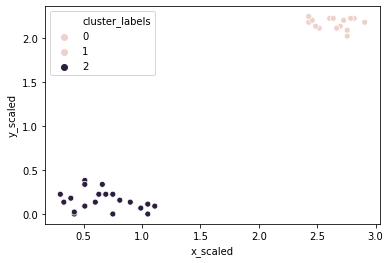

In [19]:
from scipy.cluster.hierarchy import linkage, fcluster

distance_matrix = linkage(comic_con[['x_scaled','y_scaled']], method='ward',
                          metric='euclidean')

comic_con['cluster_labels'] =fcluster(distance_matrix, 2, criterion='maxclust')

# Plotting the clusters
sns.scatterplot(x='x_scaled', y='y_scaled', data=comic_con, hue='cluster_labels')
plt.show()

Notice the two clusters correspond to the points of attractions in the figure towards the bottom (a stage) and the top right (an interesting stall)

## Hierarchical clustering: single method
Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

In [20]:
from scipy.cluster.vq import whiten

x_scaled = whiten(x_coordinate)
y_scaled = whiten(y_coordinate)

comic_con = pd.DataFrame(zip(x_coordinate, y_coordinate, x_scaled, y_scaled),
                         columns=['x_coordinate', 'y_coordinate', 'x_scaled', 
                                  'y_scaled'])
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


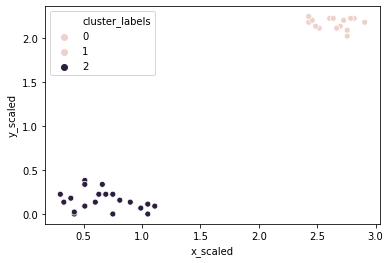

In [21]:
from scipy.cluster.hierarchy import linkage, fcluster

distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', 
                          metric='euclidean')

comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plotting the clusters
sns.scatterplot(x='x_scaled', y='y_scaled', data=comic_con, hue='cluster_labels')
plt.show()

Notice that in this example, the clusters formed are not different from the ones created using the ward method.

## Hierarchical clustering: complete method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

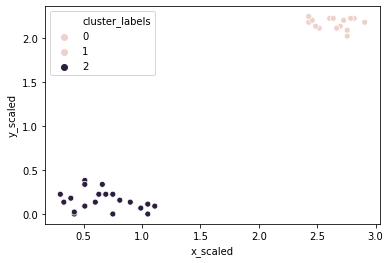

In [22]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled','y_scaled']], method='complete', 
                          metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()



---


## Visualizing Clusters
- To try to make sense out of the clusters formed
- Additonal step used for validation of clusters formed
- Spot visual trends in the data

In [23]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_edcedd06f0d99e7d9826f2859d01ec8c', width=800, height=400)

## Visualize clusters with `matplotlib`
We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a Pandas data frame, `comic_con. x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time. `cluster_labels` has the cluster labels. A linkage object is stored in the variable `distance_matrix`

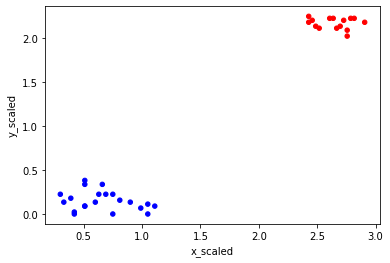

In [24]:
from matplotlib import pyplot as plt

# To plot points color coded on labels, we are required to manually create a mapping between matplotlib colors and possible cluster label values
colors = {1:'red', 2:'blue'}

# Plotting the scatter plot
comic_con.plot.scatter(x='x_scaled', y='y_scaled', 
                       c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

The two different clusters are shown in different colors.

## Visualize clusters with seaborn
Let us now visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

The data is stored in a Pandas data frame, `comic_con. x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time. `cluster_labels` has the cluster labels. A linkage object is stored in the variable `distance_matrix`.

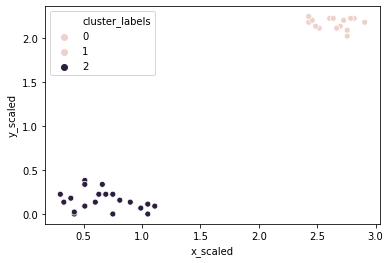

In [25]:
import seaborn as sns

# Seaborn is much more easier to use. No need to create a manual mapping of colors to all possible cluster labels
sns.scatterplot(x='x_scaled', y='y_scaled', data=comic_con, hue='cluster_labels')

plt.show()

 Notice the legend is automatically shown when using the `hue` argument.
 
 
 ---
 

## How many clusters
- Until now, we did a visual inspection of scatterplots to identify how many clusters are there
- Dendrograms do a better job at this
- Dendrograms help in showing progressions as clusters are merged

## Introduction to Dendrograms
- A dendrogram is a branching diagram thay demostrates how each cluster is composed by branching out into its child nodes

**Dendrogram Example**

![alt text](https://online.visual-paradigm.com/repository/images/0fe81efd-c6f6-41af-98d5-d9b1f0d33f2f.png)

- Every 'inverted U' represents a parent cluster splitting into two child clusters
- 'Inverted U' at the top of the figure represents a single cluster of all data points
- Width of the 'U' shape  represents the distance between the two child clusters.
  - A wider 'U' means that the 2 child clusters were further away from each other as compared to a narrower 'U' in the diagram.
- If we draw a horizontal line at any part of the dendrogram, the number of vertical lines it intersects tells us the number of clusters at that stage. The distance between those vertical lines indicate the inter-cluster distance.
- As we move our horizontal line below, the number of clusters increase, and the inter-cluster distance decreases.
- This info helps us in deciding the number of clusters to keep. Eg. Even though we haven't looked at the distribution of the data points, from the Dendrogram we can say that the top 3 clusters have the highest distances between them
- An additonal check of visualizing the data on a scatter plot may be performed before finalizing on the number of clusters



In [26]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_dbc73be553733f933eb560ded1fe0a33', width=800, height=400)

## Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

The data is stored in a Pandas data frame, `comic_con. x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time. `cluster_labels` has the cluster labels. A linkage object is stored in the variable `distance_matrix`.

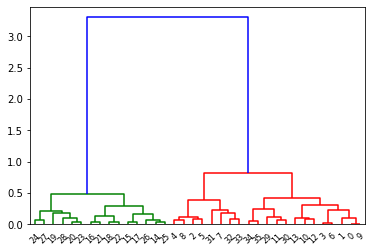

In [27]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

Notice the significant difference between the inter-cluster distances beyond the top two clusters. Since the 2 clusters are farthest from each other, it is clear that are dataset only has 2 clusters.

---

## Limitations of Hierarchical clustering
- Constructing the distance matrix throught the linkage method is the most time consuming task
- Quadratic increase of runtime with increase in datapoints
- Not feasible for large datasets

In [28]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_40e2697b7496115b424153ec2da3df58', width=800, height=400)

## FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

`sliding tackle`: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
`aggression`: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, we will perform clustering based on these attributes in the data.

This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

In [29]:
import pandas as pd

fifa = pd.read_csv('https://assets.datacamp.com/production/repositories/3842/datasets/2f0473692782600a2b7c0f7d4a0dc38295c87015/fifa_18_dataset.csv')
print(fifa.shape)
fifa.head()

(17994, 2)


,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


Normalizing the data

In [30]:
from scipy.cluster.vq import whiten

fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
fifa.head()

,sliding_tackle,aggression,scaled_sliding_tackle,scaled_aggression
0,23,63,1.070924,3.609257
1,26,48,1.210610,2.749910
2,33,56,1.536544,3.208228
3,38,78,1.769353,4.468604
4,11,29,0.512181,1.661404


                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


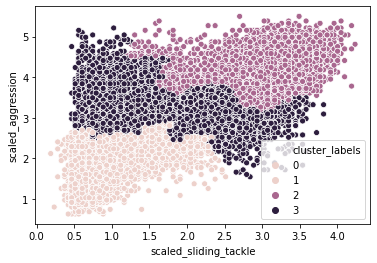

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 
                          method='ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression','cluster_labels']]
      .groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', 
                hue='cluster_labels', data=fifa)
plt.show()

Notice how long it took to run hierarchical clustering on a few thousand data points. 


---
---


# Part-3: K-Means Clustering
[SLIDES](https://projector-video-pdf-converter.datacamp.com/14739/chapter3.pdf)

In [32]:
from IPython.display import IFrame
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_e3f697151e486ac53aa49b0b8d2a256c', width=800, height=400)

## Why KMeans Clustering
- Issue with hierarchical clustering: high runtime cost
- KMeans runs significantly faster on large datasets

## Two steps to perform KMeans clustering
### Step-1: Generate cluster centers
> **`kmeans(obs, k_or_guess, iter, thresh, check_finite)`**
- **`obs`:** List of observations standardized through the `whiten()` method
- **`k_or_guess`:** Num of clusters
- **`iter`:** Num of iterations of algorithm to perform (default: 20)
- **`thresh`:** Threshold (default: 1e-05 or 0.00001). Algorithm is terminated if the change in distortion since the last KMeans iteration is less than or equal to the provided threshold.
- **`check_finite`:** Bool whether to check if the observations contain only finite numbers (default: True). Helps check for inf, NaNs in data. default=True ensures that NaNs, infs are not considered for classification which in turn ensures that the results are accurate and unbiased.

- kmeans returns two objects- cluster centers and distortion
- Cluster centers are also known as the code book

#### How is distortion calculated?
- Sum of square of distances between the data points and cluster centers.

### Step-2: Assign cluster labels using `vq()`
> **`vq(obs, code_book, check_finite=True)`**
- **`obs`:** List of standardized observations (can be standardized using `whiten()`)
- **`code_book`:** Cluster centers as obtained from the `kmeans` method
- **`check_finite`:** Boolean value indicating whether check needs to be performed on the data for presence of infinite or NaN values

- **`vq()`** returns cluster labels as list (also knows as the code-book index) and list of distortions.

### A note on distortions
- Both `kmeans()` and `vq()` return distortions
- `kmeans()` returns only one distortion value for the overall dataset. `vq()` returns a list of distortions, one for each data point. Mean of the distortion values obtained from `vq()` should be approximately equal to the value of distortion obtained from `kmeans()` method for the same dataset.


## K-means clustering: first exercise
We'll use k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

Define cluster centers through `kmeans()` function. It has two required arguments: *observations* and *number of clusters*.
Assign cluster labels through the `vq()` function. It has two required arguments: *observations* and *cluster centers*.

In [33]:
# Given x and y coordinate dataset for comic-con
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87,
       83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27,
       17, 17]

y_coordinate = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 
                97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]

comic_con = pd.DataFrame(zip(x_coordinate, y_coordinate), columns=['x_coordinate', 'y_coordinate'])
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [34]:
# whitening/standardizing the daata
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


**Performing KMeans clustering using Scipy**


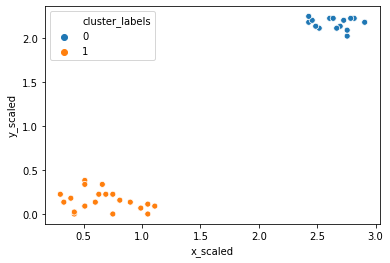

In [35]:
from scipy.cluster.vq import kmeans, vq
import seaborn as sns
import matplotlib.pyplot as plt

# Performing kmeans with 2 clusters
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']], 2)

# Cluster labels
comic_con['cluster_labels'], distortions_list = vq(comic_con[['x_scaled','y_scaled']],
                                                   cluster_centers)

# Plotting
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)
plt.show()

Notice that the clusters formed are exactly the same as hierarchical clustering that we did previously.

## How many clusters?
- In hierarchical clustering, we could use Dendrogram to analyze how many clusters are there in the data
- In KMeans clustering, there is no absolute method to find the right number of clusters (k).
-  There are several methods that can be used

### Elbow method
- Plot distortions vs num_clusters. Wherever, there is an 'elbow' seen in the line plot, meaning that distortion no longer decreases much with increase in num_clusters, the elbow point may be use as the right number of clusters.
- **Distortions:** It is the sum of squares of the distances of each data point with its cluster center.
- Distortion has inverse relation with number of clusters. It decreases with increase in number of clusters. 
- Large number of clusters would mean that each cluster is smaller and the points are closer to one another, thereby decreasing distortion. Distortion becomes 0 when number of clusters = number of points.

#### Limitations of elbow method
- Elbow method only gives an indication to the optimal number of clusters 
- Does not always pinpoint to how many clusters to use
- Fails when the data is evenly distributed


### Other methods
- Average silhouette
- gap statistic

In [36]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_28080a378b33048339fc9297865aefd1', width=800, height=400)

## Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters.

In [37]:
# Given x and y coordinate dataset for comic-con
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87,
       83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27,
       17, 17]

y_coordinate = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 
                97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]

comic_con = pd.DataFrame(zip(x_coordinate, y_coordinate), columns=['x_coordinate', 'y_coordinate'])
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [38]:
# Standardizing data
from scipy.cluster.vq import whiten
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


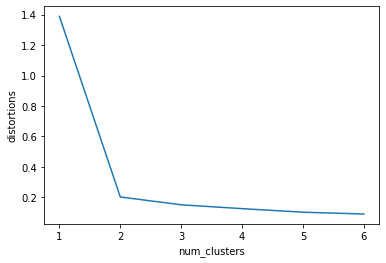

In [39]:
from scipy.cluster.vq import kmeans, vq
import seaborn as sns
import matplotlib.pyplot as plt

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

So, optimal number of clusters = 2 

## Elbow method on uniform data
In the earlier exercise, we constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points.

In [40]:
x_coordinate = [39, 42, 58, 43, 13, 32, 60, 13, 26, 27, 29, 51, 14, 50, 62, 59, 50,
       62, 65, 17, 25, 45, 55, 48, 42, 58, 68, 58, 37, 55]

y_coordinate = [3, 7, 3, 3, 6, 5, 3, 4, 0, 9, 6, 3, 0, 7, 4, 1, 3, 0, 2, 5, 9, 5,
       8, 6, 3, 1, 4, 2, 8, 7]

uniform_data = pd.DataFrame(zip(x_coordinate, y_coordinate), 
                            columns=['x_coordinate','y_coordinate'])
uniform_data.head()

,x_coordinate,y_coordinate
0,39,3
1,42,7
2,58,3
3,43,3
4,13,6


In [41]:
from scipy.cluster.vq import whiten

uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])

uniform_data.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,39,3,2.376199,1.152237
1,42,7,2.558984,2.688554
2,58,3,3.533835,1.152237
3,43,3,2.619912,1.152237
4,13,6,0.792066,2.304475


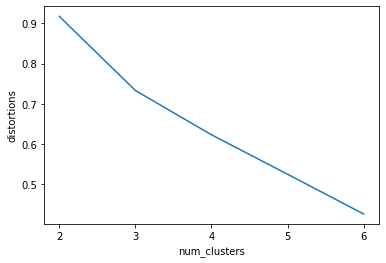

In [42]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

From the line plot, no clear 'elbow' exists. 
**Distortion vs num_clusters plot fails to indicate an optimal value of k when the data is uniform.**

---

## Adantages of KMeans clustering
- Overcomes the problem of large runtime in hierarchial clustering

## Limitations of KMeans clustering
- How to find the right \_K_ (number of clusters)? Elbow method is one of the ways, but may not work always
- Large impact of clusters formed because of random seed values
- Biased towards equal sized clusters


### Impact of seeds
- Random seed value affects the clusters formed. So while using it is always recommended to set a seed value before performing clustering to get consistent results when run multiple times.
- Impact of seed value is more when the data is uniform.


In [43]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_5b0667dab65a0f86e1f9f508eb3ad80c', width=800, height=400)

## Impact of seeds on distinct clusters
We will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

The data is stored in a Pandas data frame, `comic_con. x_scaled` and `y_scaled` are the column names of the standardized X and Y coordinates of people at a given point in time.

In [44]:
# Given x and y coordinate dataset for comic-con
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87,
       83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27,
       17, 17]

y_coordinate = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 
                97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]

comic_con = pd.DataFrame(zip(x_coordinate, y_coordinate), columns=['x_coordinate', 'y_coordinate'])

# Standardizing data
from scipy.cluster.vq import whiten
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


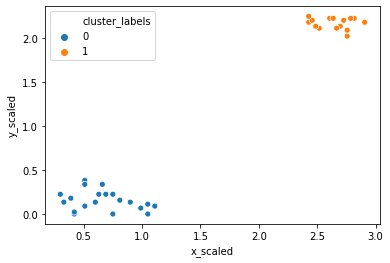

In [45]:
from numpy import random

# Initializing random seed to 0
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Changing the seed value from `0` to the list `[1, 2, 1000]`. Since our dataset has clearly defined visual clusters, changing the seed SHOULD NOT impact the resulting clusters.**

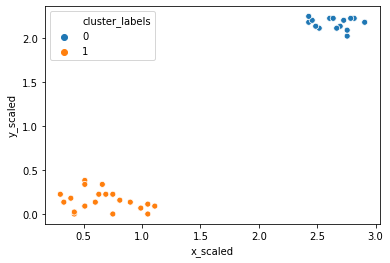

In [46]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

Notice that the plots have not changed after changing the seed as the clusters are well-defined.

## Uniform clustering patterns
Now that we are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

In [47]:
x_coordinate = [33.87552801, 38.20874789, 35.74058788, 32.54696343, 62.06314583,
       53.76968389, 32.49035022, 55.32520176, 68.10254176, 53.28312355,
       67.71803005, 32.84550285, 61.78083409, 62.07246733, 37.2423105 ,
       48.39279681, 35.48978845, 65.60854566, 38.02888394, 65.49367503,
       41.60372439, 48.41398475, 41.8196699 , 51.7691827 , 45.17995059,
       38.02218597, 56.37185206, 52.05250382, 44.24373638, 40.3328119 ,
       53.5965755 , 45.87265296, 54.0000117 , 52.6886879 , 53.25422918,
       63.54212627, 65.38884629, 49.73312042, 48.58080531, 48.03000662,
       44.6671251 , 65.30935896, 40.58584807, 43.93533778, 32.87374964,
       43.17638646, 61.44735547, 47.90212636, 47.57275054, 50.65221647,
       45.44652101, 48.17757171, 50.11893028, 37.33082581, 53.28605845,
       32.60601743, 46.59545712, 54.91413224, 61.18758173, 62.256238  ,
       47.80710345, 65.44265167, 36.17446485, 60.90339818, 44.23811688,
       40.34232189, 57.19910238, 36.08806305, 35.56663867, 42.41968177,
       59.65269146, 32.62462929, 55.80216992, 65.4991867 , 45.54670964,
       61.00536902, 58.19939104, 63.11931771, 55.31708313, 45.60947216,
       45.63141645, 46.74818575, 68.28352429, 61.96714675, 48.96104619,
       45.37856388, 50.84116864, 52.56595621, 39.13493121, 48.99176373,
       58.05200858, 41.37122591, 64.35140055, 35.02226785, 48.60847435,
       42.64864932, 57.58495149, 49.08107021, 51.42659241, 62.31551719,
       26.84075282, 26.9519412 , 32.56213982, 27.10884541, 20.77972888,
       34.64864231, 27.3347144 , 38.63528806, 27.36278088, 22.25173068,
       23.56181791, 28.68340206, 33.84077613, 28.22316026, 38.08583938,
       29.88562784, 28.40850494, 31.72078699, 25.2107398 , 28.67688927,
       32.24862075, 26.38752714, 28.69901004, 26.07549743, 34.28710983,
       24.02682404, 30.83187787, 32.37571559, 22.76230802, 35.25122351,
       70.18239123, 79.58988482, 65.72716493, 68.483399  , 76.41358468,
       79.26874523, 64.84182259, 71.11774102, 78.34020408, 63.61846311,
       67.53968321, 69.15087805, 67.7921338 , 76.87140431, 62.00437158,
       67.49125961, 71.90747913, 65.27576084, 77.58529515, 79.66066418,
       77.3246352 , 68.5790018 , 65.97649575, 71.55575552, 69.83671683,
       70.49432188, 72.62743438, 67.66970193, 63.44559189, 75.45783601]

y_coordinate = [44.89342095, 41.11632695, 57.41800588, 57.21808249, 47.19694448,
       35.95195917, 42.02185361, 52.54832221, 52.31212456, 31.63628689,
       47.60524807, 54.23496141, 60.8249876 , 65.23558661, 48.23757709,
       67.52456486, 54.10211414, 51.8513512 , 39.82817721, 44.28386899,
       60.21348801, 45.35513786, 35.81066079, 56.95992181, 61.05673695,
       44.3455702 , 49.53371078, 57.76601798, 41.7427565 , 52.07742897,
       55.58701182, 43.81629667, 61.46690781, 44.37759236, 44.72275113,
       47.98225455, 47.73690086, 46.04982378, 56.78708413, 56.60380297,
       61.71604212, 56.52781557, 45.81317068, 49.10776882, 41.14505632,
       64.84595737, 62.46952021, 58.29912471, 48.53320807, 48.79467674,
       40.65821118, 30.46658829, 65.18053982, 41.7300068 , 69.24321762,
       56.00106984, 39.63738121, 38.40458709, 39.63915235, 38.73957078,
       36.00996935, 45.62729042, 57.17020665, 51.32130045, 40.89880525,
       41.15484687, 58.21497749, 43.45728537, 42.72274718, 39.27124659,
       42.66172394, 57.40714755, 34.25546896, 61.29461186, 30.51392786,
       65.03769516, 63.37885691, 62.92620573, 35.88019397, 52.89656063,
       37.25902081, 31.67028002, 47.16555533, 50.88239704, 41.7797539 ,
       49.38557057, 52.58865855, 40.89034886, 65.91171887, 46.57669291,
       63.55568215, 45.4501224 , 43.70526533, 46.58949707, 38.91660456,
       55.46764508, 67.89462117, 36.02362381, 59.98536063, 54.70049854,
       82.72356822, 77.94443633, 75.40050307, 68.91634077, 72.8427495 ,
       74.71747016, 70.61496975, 76.12679438, 80.60280865, 70.19696262,
       68.23133123, 83.83579387, 83.97371743, 70.71122299, 72.22425104,
       79.61715462, 74.81720151, 81.28549433, 79.83947613, 82.5450522 ,
       72.41216494, 74.6039565 , 68.84261456, 73.2893676 , 80.51600557,
       82.63965729, 66.38754732, 73.35737436, 72.53759838, 73.71960775,
       78.16166533, 75.99349931, 67.23738628, 82.50606009, 77.72556254,
       73.68057343, 83.33967753, 84.67897398, 71.78110972, 68.16591019,
       83.87925655, 74.22367682, 78.15268345, 74.21207007, 75.13106436,
       77.71960453, 71.08256275, 74.66344797, 80.3555998 , 73.34017066,
       70.12614603, 77.46797551, 77.65232497, 76.70948616, 73.94355101,
       71.19864361, 76.43418687, 70.62890953, 78.5744389 , 68.44893502]

mouse = pd.DataFrame(zip(x_coordinate, y_coordinate), 
                     columns=['x_coordinate','y_coordinate'])

In [48]:
from scipy.cluster.vq import whiten

mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])
mouse.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,33.875528,44.893421,2.209458,2.977524
1,38.208748,41.116327,2.492083,2.727011
2,35.740588,57.418006,2.331103,3.808208
3,32.546963,57.218082,2.122806,3.794948
4,62.063146,47.196944,4.047935,3.130303


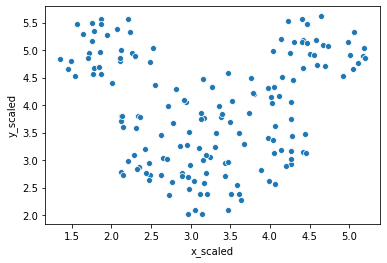

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='x_scaled', y='y_scaled', data=mouse)
plt.show()

Notice there are no well defined visual clusters appearing in this dataset.   
Performing KMeans clustering...

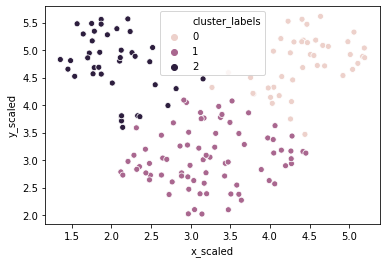

In [50]:
from scipy.cluster.vq import kmeans, vq

# Creating 3 clusters
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']], 3)

# Cluster labels
mouse['cluster_labels'], distortions_list = vq(mouse[['x_scaled','y_scaled']],
                                               cluster_centers)

# Plotting the clusters
sns.scatterplot(x='x_scaled', y='y_scaled', data=mouse, hue='cluster_labels')
plt.show()

Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

---

## FIFA 18: defenders revisited
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

`defending`: a number which signifies the defending attributes of a player
`physical`: a number which signifies the physical attributes of a player
These are typically defense-minded players. In this exercise, we will perform clustering based on these attributes in the data.

In [51]:
import pandas as pd

fifa = pd.read_csv('https://assets.datacamp.com/production/repositories/3842/datasets/10b1fd2d470d12f2486be7ffb05ab96a1b745631/fifa_18_sample_data.csv')
print(fifa.shape)
print(fifa.columns)
fifa.head()

(1000, 185)
Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,...,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,...,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,High,Medium,Right,75,89,62,81,83,96,81,...,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,...,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,Medium,Medium,Right,15,13,25,55,11,30,14,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [52]:
from scipy.cluster.vq import whiten

fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


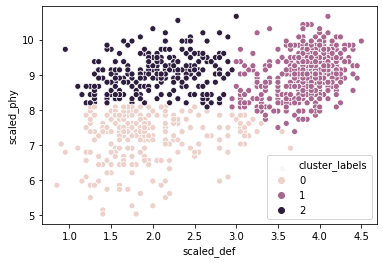

In [53]:
from numpy import random
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

Notice that the seed has an impact on clustering as the data is uniformly distributed.

---
---

# Part-4: Clustering in Real World
[SLIDES](https://projector-video-pdf-converter.datacamp.com/14739/chapter4.pdf)

In [54]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_3b9bceaa8b320b39d67d9dedb83d343c', width=800, height=400)

## Extract RGB values from image
There are broadly three steps to find the dominant colors in an image:

- Extract RGB values into three lists.
- Perform k-means clustering on scaled RGB values.
- Display the colors of cluster centers.

In [55]:
!wget --no-check-certificate -q 'https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg' -O batman.jpg

(169, 269, 3)


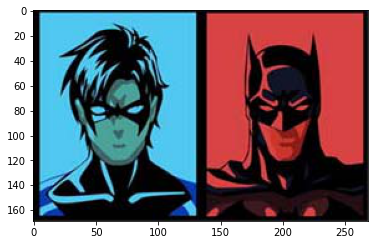

In [56]:
import matplotlib.image as image
import matplotlib.pyplot as plt

batman_image = image.imread('batman.jpg')
plt.imshow(batman_image)
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
r = []
g = []
b = []
for pixels in batman_image:
    for temp_r, temp_g, temp_b in pixels:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

**Creating a DataFrame with RGB values as columns**

In [57]:
batman_df = pd.DataFrame(zip(r,g,b), columns=['red','green','blue'])
batman_df.head()

,red,green,blue
0,36,28,25
1,39,21,19
2,52,20,21
3,61,27,28
4,37,15,18


**How many dominant colors are present?**

We'll use KMeans clustering to find the dominant color in the image. But, we'll have to standardize the features before clustering.

In [58]:
# Standardizing / Whitening the features
from scipy.cluster.vq import whiten

batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_green'] = whiten(batman_df['green'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])

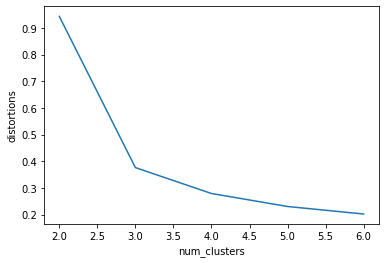

In [59]:
from scipy.cluster.vq import kmeans, vq
import seaborn as sns
import matplotlib.pyplot as plt

distortions = []
num_clusters = range(2,7)

for i in num_clusters:
  cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_green',
                                                  'scaled_blue']], i)
  distortions.append(distortion)

# Creating DataFrame of num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortions':distortions})

# Plotting the elbow plot
sns.lineplot(x='num_clusters',y='distortions', data=elbow_plot)
plt.xticks()
plt.show()

Notice that there are three distinct colors present in the image, which is supported by the elbow plot.

## Display dominant colors
To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: `converted_pixel = standardized_pixel * pixel_std / 255`

The RGB values are stored in a data frame, `batman_df`. The scaled RGB values are stored in columns, `scaled_red`, `scaled_blue` and `scaled_green`. The cluster centers are stored in the variable `cluster_centers`, which were generated using the `kmeans()` function with three clusters.

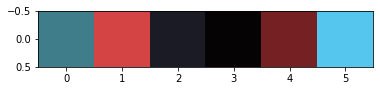

In [60]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()
colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

---

## Document Clustering
Clustering documents based on topic is a NLP problem.

Steps commonly perfomed for all NLP problems are:
1. Clean the data before processing- remove all words that are not required (punctuation, emoticons, stop words).
2. Find the TF-IDF word frequency. IT helps in determining the importance of terms in a document
3. Cluster TF-IDF matrix
4. Find top terms, documents in each cluster

## Clean and tokenize data
- Text cannot be analyzed directly without breaking it into smaller parts called tokens
- Tokenizing can be done using nltk's `word_tokenize()` method

## Document term matrix and sparse matrices
- Rows of this matrix signify different terms from a vocabulary, and columns represent different documents. Hence, each element of this matrix would signify how many times does a particular term from vocabulary occur in a particular document. In some implementations, rows may represent different documents and columns- different words from vocabulary.
- Since most of the elements of such matrices are 0, sparse matrices are used to store these matrices more efficiently. 

## TF-IDF (Term Frequency- Inverse Document Frequency)
- A weighted measure: Evaluate how important a word is to a document in a collection

```Python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(max_df=0.8, max_features=50, min_df=0.2, tokenizer=remove_noise)

tfidf_matrix = tfidf_vectorizer.fit_transform(data)
```
- `max_df` and `min_df` signify the maximum and minumum fraction of documents a word should occur in. `max_features`- max. number of features(in this case, words) to keep.
- `fit_transform` method creates the TF-IDF matrix for the data as a CSR matrix

## Clustering with sparse matrices
- `kmeans()` in SciPy does not support sparse matrices
- So, we've to convert the TF-IDF CSR matrix to its expanded form using the `.to_dense()` method
- Then, `kmeans()` can be applied to get the cluster centers.
- We **do not use** the elbow plot as it will take an erratic form due to large number of variables

## Top terms per cluster
- Each cluster center is a list of TF-IDF weights which signifies the importance of each term in the matrix
- To find the top terms

```Python
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
  center_terms = dict(zip(terms, list(cluster_centers[i])))

  sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
  print(sorted_terms[:3])
```

## More options to consider while preparing text data for clustering
- Work with hyperlinks, emoticons etc. (Eg. replace emoticons with corresponding words)
- Normalizing and stemming words (run, ran, running -> run)
- `to_dense()` may not work with large datasets. In that case, we need to find another implementation of kmeans that works with sparse matrices
- 

In [61]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_5dc56d9347201e5dbf8a4ff54ad16327', width=800, height=400)

## TF-IDF of movie plots
Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

We'll use the `TfidfVectorizer` class to perform the TF-IDF of movie plots stored in the list plots. The remove_noise() function is available to use as a tokenizer in the TfidfVectorizer class. The .fit_transform() method fits the data into the TfidfVectorizer objects and then generates the TF-IDF sparse matrix.

In [62]:
import pandas as pd

movies = pd.read_csv('https://assets.datacamp.com/production/repositories/3842/datasets/8bae4cc436725404038a278f6439b096bebbfd34/movies_plot.csv')
print(movies.shape)
movies.head()

(1000, 2)


,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...


In [63]:
import nltk
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')

stop_words_2 = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'dont', 'should', 'shouldve', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'arent', 'couldn', 'couldnt', 'didn', 'didnt', 'doesn', 'doesnt', 'hadn', 'hadnt', 'hasn', 'hasnt', 'haven', 'havent', 'isn', 'isnt', 'ma', 'mightn', 'mightnt', 'mustn', 'mustnt', 'needn', 'neednt', 'shan', 'shant', 'shouldn', 'shouldnt', 'wasn', 'wasnt', 'weren', 'werent', 'won', 'wont', 'wouldn', 'wouldnt']

def remove_noise(text, stop_words = stop_words_2):
  tokens = word_tokenize(text)
  cleaned_tokens = []
  for token in tokens:
    token = re.sub('[^A-Za-z0-9]+', '', token)
    if len(token) > 1 and token.lower() not in stop_words:
      # Get lowercase
      cleaned_tokens.append(token.lower())
  return cleaned_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing TfidfVectorizer class with min and max frequencies of 0.1 and 0.75, 
# and 50 maximum features.
tfidf_vectorizer = TfidfVectorizer(min_df=0.1, max_df=0.75, max_features=50,
                                   tokenizer=remove_noise)

# Using the .fit_transform() method on the movie plots
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['Plot'])
tfidf_matrix

<1000x50 sparse matrix of type '<class 'numpy.float64'>'
	with 13416 stored elements in Compressed Sparse Row format>

## Top terms in movie clusters
Now that we have created a sparse matrix, we'll generate cluster centers and print the top three terms in each cluster. We'll use the `.todense()` method to convert the sparse matrix, `tfidf_matrix` to a normal matrix for the `kmeans()` function to process. Then, use the `.get_feature_names()` method to get a list of terms in the `tfidf_vectorizer` object. The `zip()` function in Python joins two lists.

With a higher number of data points, the clusters formed would be defined more clearly. 

In [65]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, cluster_centers[i]))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms)

['film', 'life', 'wife', 'john', 'family', 'father', 'town', 'new', 'love', 'man', 'mother', 'friend', 'also', 'help', 'death', 'find', 'home', 'one', 'first', 'killed', 'time', 'finds', 'later', 'takes', 'police', 'take', 'goes', 'however', 'house', 'two', 'nt', 'decides', 'men', 'tries', 'another', 'away', 'make', 'money', 'back', 'returns', 'way', 'tells', 'leave', 'get', 'day', 'leaves', 'go', 'night', 'next', 'car']
['one', 'back', 'two', 'get', 'tells', 'police', 'however', 'home', 'later', 'goes', 'new', 'finds', 'car', 'away', 'time', 'father', 'man', 'also', 'men', 'money', 'takes', 'go', 'house', 'find', 'tries', 'take', 'night', 'mother', 'next', 'day', 'help', 'love', 'killed', 'way', 'life', 'first', 'nt', 'decides', 'make', 'another', 'family', 'leave', 'returns', 'death', 'leaves', 'friend', 'wife', 'town', 'film', 'john']


Notice positive, warm words in the first cluster and words referring to action in the second cluster.

---

## Clustering with multiple features
- It is not possible to visualize clusters with more than features. However, there are a few techniques to validate our clustering results.
- This is done after we have performed the clustering, plotted the elbow plot and generated cluster labels

### Basic checks
#### Cluster centers
- Check how the cluster centers vary with respect to the overall data
- If cluster center of some features do not vary significantly with respect to the overall data, it is an indication that we can drop that feature in the next run.

#### Size of clusters formed
- If one or more clusters are significantly smaller than the rest, we may want to double check if their cluster centers are similar to other clusters. If yes, we should reduce the number of clusters in the subsequent run.


#### Visualizations
- Even though all variables cannot be visualized across clusters, there are other simple visualizations that help us understand the results of clustering
- Visualize cluster centers
- Visualize other variables stacked against each other

```Python
fifa.groupby('cluster_labels')[scaled_features].mean().plot(kind='bar')
plt.show()
```
- We can create a line chart and see how variables vary across clusters

#### Top items in clusters

---

### Feature Reduction
- When dealing with large number of features, techniques of feature reduction can be used 
  - Factor Analysis
  - Multi dimensional scaling

In [66]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_2d780adc76814ee93f620ef7afd406bd', width=800, height=400)

## Basic checks on clusters
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (`pac`), Dribbling (`dri`) and Shooting (`sho`) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a Pandas data frame, `fifa`. The scaled column names are present in a list scaled_features. The cluster labels are stored in the cluster_labels column. Recall the `.count()` and `.mean()` methods in Pandas help you find the number of observations and mean of observations in a data frame.

In [67]:
fifa = pd.read_csv('https://assets.datacamp.com/production/repositories/3842/datasets/10b1fd2d470d12f2486be7ffb05ab96a1b745631/fifa_18_sample_data.csv')

print(fifa.shape)
fifa.head()

(1000, 185)


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,...,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,...,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,68.0,Neymar,True,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,High,Medium,Right,75,89,62,81,83,96,81,...,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Normal,True,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,...,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,92.0,Normal,True,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,Medium,Medium,Right,15,13,25,55,11,30,14,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [68]:
from scipy.cluster.vq import whiten

fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])

In [69]:
## Performing clustering with 3 clusters
from scipy.cluster.vq import kmeans, vq
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers, _ = kmeans(fifa[['scaled_pac','scaled_dri','scaled_sho']], 3)

fifa['cluster_labels'], _ = vq(fifa[['scaled_pac','scaled_dri','scaled_sho']], 
                            cluster_centers)

In [70]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    362
1    456
2    182
Name: ID, dtype: int64
cluster_labels
0    62955.801105
1    77050.438596
2    63225.274725
Name: eur_wage, dtype: float64


In this example, the cluster sizes are not very different, and there are no significant differences that can be seen in the wages. Further analysis is required to validate these clusters.

## FIFA 18: what makes a complete player?
The overall level of a player in FIFA 18 is defined by six characteristics: pace (`pac`), shooting (`sho`), passing (`pas`), dribbling (`dri`), defending (`def`), physical (`phy`).

In this exercise, we will use all six characteristics to create clusters. The data for this exercise is stored in a Pandas dataframe, `fifa`. `features` is the list of these column names and `scaled_features` is the list of columns which contains their scaled values. The following have been pre-loaded: `kmeans`, `vq` from `scipy.cluster.vq`, `matplotlib.pyplot` as `plt`, `seaborn` as `sns`.

Before you start the exercise, you may wish to explore scaled_features in the console to check out the list of six scaled columns names.

                scaled_pac  scaled_sho  ...  scaled_def  scaled_phy
cluster_labels                          ...                        
0                 6.684708    5.428941  ...    2.502501    8.335189
1                 5.448079    3.667153  ...    3.966944    9.210122

[2 rows x 6 columns]


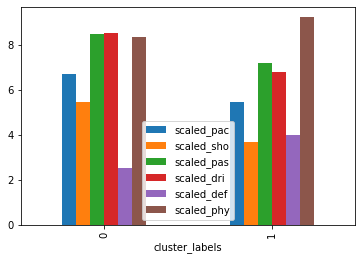

In [71]:
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 
                   'scaled_def', 'scaled_phy']

fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])
fifa['scaled_pas'] = whiten(fifa['pas'])

# Create centroids with 6 scaled columns kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

In [72]:
# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


The data was sorted before we performed the clustering. Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.

---

# Final Thoughts

In [73]:
IFrame('https://projector.datacamp.com/?auto_play=play&projector_key=course_14739_26cea23758affc4489253abfa7b4f068', width=800, height=400)

**---THE END---**